# Projeto 2 - Turing Usp

O objetivo principal é fazer uma predição de uma base de dados para determinar se um cientista de dados gostaria ou não de mudar de emprego. Para isto, farei uma descrição do dataset, e logo após começarei a limpar a base, para, então, começar a predição.

Esses datasets possuem informações a respeito de candidatos para um determinado processo seletivo. As colunas presentes são: 
-	enrollee_id: ID exclusivo para o candidato
-	city: Código da cidade
-	city_ development _index: Índice de desenvolvimento da cidade (em escala)
-	gender: Gênero do candidato
-	relevent_experience: Experiência relevante do candidato
-	enrolled_university: Tipo de curso universitário matriculado, se houver
-	education_level: Nível de educação do candidato
-	major_discipline: Major principal de educação do candidato
    -	STEM: Science, Technology, Engineering, and Math Degree
    -	Business Major: Administração de negócios
    -	Humanities: Humanidades
    -	Arts: Artes
    -	No major: Não faz/possui um major
    -	Other: Outro
-	experience: Experiência total do candidato em anos
-	company_size: Nº de funcionários na empresa do empregador atual
-	company_type: Tipo de empregador atual
-	lastnewjob: Diferença em anos entre o emprego anterior e o emprego atual
-	training_hours: Horas de treinamento concluidas
-	target: 0 - Não está procurando uma mudança de emprego ou 1 - Procurando uma mudança de emprego (essa coluna está presente apenas no dataset de treino) 


## Importação dos dados e de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [2]:
df = pd.read_csv('train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## Limpeza

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
df.isnull().sum().where(df.isnull().sum() > 0).dropna()

gender                 4508.0
enrolled_university     386.0
education_level         460.0
major_discipline       2813.0
experience               65.0
company_size           5938.0
company_type           6140.0
last_new_job            423.0
dtype: float64

Percebemos que as colunas gender,enrolled_university, education_level, major_discipline, experience, company_size, company_type e last_new_job tem dados nulos que precisamos preencher ou remover. No caso, para os valores com menos dados faltantes, apenas excluirei tais dados. Para os outros dados, incluirei um novo valor categorico.

In [5]:
df.dropna(subset=['enrolled_university', 'education_level','experience', 'last_new_job'], inplace = True)

In [6]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0


In [7]:
df.isnull().sum().where(df.isnull().sum() > 0).dropna()

gender              3863.0
major_discipline    2222.0
company_size        5310.0
company_type        5476.0
dtype: float64

In [8]:
df.fillna('Missing Value',inplace = True)

In [9]:
for i in df.columns:
    print(f'{i} : {df[i].unique()}')

enrollee_id : [ 8949 29725 11561 ... 24576  5756 23834]
city : ['city_103' 'city_40' 'city_21' 'city_162' 'city_176' 'city_160' 'city_46'
 'city_61' 'city_114' 'city_13' 'city_159' 'city_102' 'city_67' 'city_100'
 'city_16' 'city_104' 'city_64' 'city_101' 'city_83' 'city_105' 'city_73'
 'city_75' 'city_93' 'city_11' 'city_36' 'city_20' 'city_71' 'city_57'
 'city_152' 'city_19' 'city_65' 'city_74' 'city_173' 'city_136' 'city_98'
 'city_97' 'city_90' 'city_50' 'city_138' 'city_82' 'city_157' 'city_89'
 'city_150' 'city_175' 'city_28' 'city_115' 'city_94' 'city_59' 'city_165'
 'city_145' 'city_142' 'city_26' 'city_12' 'city_37' 'city_43' 'city_116'
 'city_23' 'city_99' 'city_149' 'city_10' 'city_45' 'city_41' 'city_128'
 'city_70' 'city_158' 'city_123' 'city_7' 'city_72' 'city_106' 'city_143'
 'city_78' 'city_109' 'city_24' 'city_48' 'city_144' 'city_91' 'city_146'
 'city_133' 'city_126' 'city_118' 'city_134' 'city_9' 'city_167' 'city_27'
 'city_84' 'city_54' 'city_39' 'city_79' 'city_76'

Para melhor tratamento de colunas categóricas ordinária, colocarei os missing values como o menor nivel, e criarei uma nova coluna para verificar se a ausencia dos dados interfere no target. Além disso, passarei os valores categóricos para valores numéricos para fazer as predições.

## City

<AxesSubplot:xlabel='city', ylabel='count'>

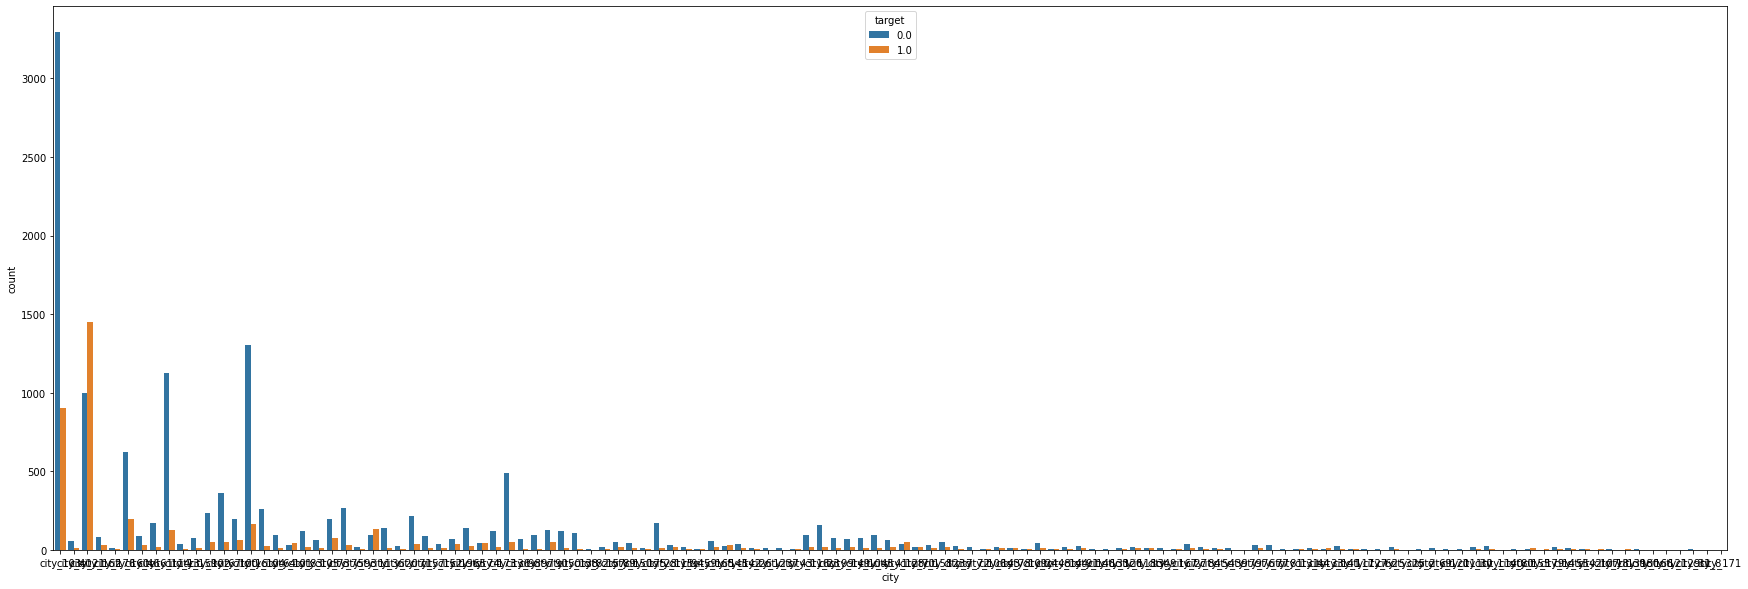

In [10]:
plt.figure(figsize=(30, 10))
sns.countplot(x = 'city', data = df, hue = 'target')

Percebemos que a distribuição de target para cada cidade é diferente, levando-nos a concluir que tal variavel influencia no target.

## Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

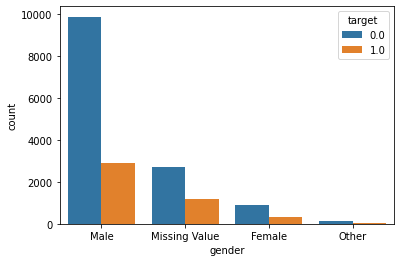

In [11]:
sns.countplot(x = 'gender', data = df, hue = 'target')

In [12]:
for i in df['gender'].unique():
    print(i)
    print(df[(df['gender'] == i) & (df['target'] == 1)].shape[0]/df[df['gender'] == i].shape[0])

Male
0.22721578452865643
Missing Value
0.3008024851151954
Female
0.2595356550580431
Other
0.2543352601156069


Apesar da variação da proporção não ser tão grande, as variaveis male e missing value possuem uma leve diferença. Portanto, tal variável também será utilizada na predição.

## relevent_experience

<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

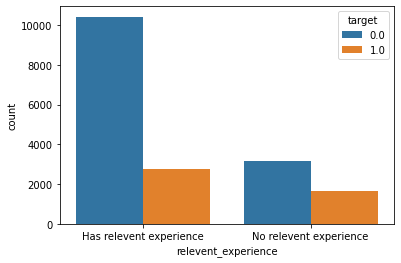

In [13]:
sns.countplot(x = 'relevent_experience', data = df, hue = 'target')

Aqui, é claro que a distribuição de target em cada valor de relevent_experience é diferente.

## enrolled_university

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

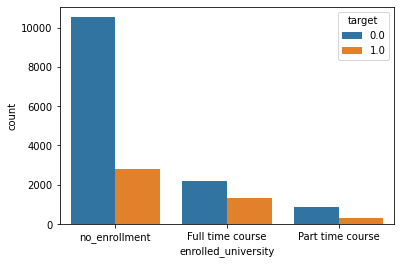

In [14]:
sns.countplot(x = 'enrolled_university', data = df, hue = 'target')

Aqui, a distribuição também parece influenciada

## education_level

<AxesSubplot:xlabel='education_level', ylabel='count'>

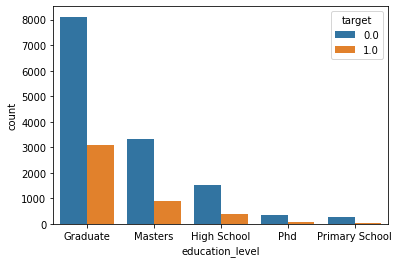

In [15]:
sns.countplot(x = 'education_level', data = df, hue = 'target')

In [16]:
for i in df['education_level'].unique():
    print(i)
    print(df[(df['education_level'] == i) & (df['target'] == 1)].shape[0]/df[df['education_level'] == i].shape[0])

Graduate
0.27466928852341793
Masters
0.20908230842005676
High School
0.1949685534591195
Phd
0.13784461152882205
Primary School
0.12714776632302405


## major_discipline

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

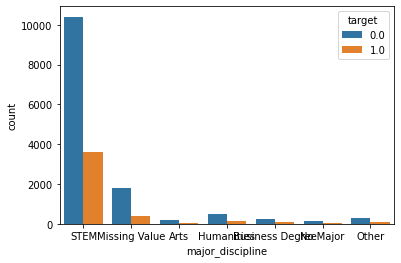

In [17]:
sns.countplot(x = 'major_discipline', data = df, hue = 'target')

In [18]:
for i in df['major_discipline'].unique():
    print(i)
    print(df[(df['major_discipline'] == i) & (df['target'] == 1)].shape[0]/df[df['major_discipline'] == i].shape[0])

STEM
0.2565568498534982
Missing Value
0.18766876687668768
Arts
0.20967741935483872
Humanities
0.20520673813169985
Business Degree
0.2608695652173913
No Major
0.24528301886792453
Other
0.25274725274725274


## experience

In [19]:
for i in df['experience'].unique():
    print(i)
    print(df[(df['experience'] == i) & (df['target'] == 1)].shape[0]/df[df['experience'] == i].shape[0])

>20
0.15273412947831552
15
0.1661676646706587
5
0.29094988780852654
11
0.2280431432973806
13
0.18863049095607234
7
0.2953156822810591
17
0.1691842900302115
2
0.3370110330992979
16
0.13319672131147542
1
0.42105263157894735
4
0.32126348228043144
10
0.2135306553911205
<1
0.4567627494456763
14
0.17750439367311072
18
0.14285714285714285
19
0.16326530612244897
12
0.17894736842105263
6
0.28608923884514437
9
0.21153846153846154
3
0.3491414554374489
8
0.23958333333333334
20
0.2323943661971831


Aqui, trataremos a variavel como ordinal.

## company_size

In [20]:
for i in df['company_size'].unique():
    print(i)
    print(df[(df['company_size'] == i) & (df['target'] == 1)].shape[0]/df[df['company_size'] == i].shape[0])

Missing Value
0.41544256120527306
50-99
0.1752542372881356
<10
0.1642512077294686
10000+
0.18737270875763748
5000-9999
0.17896678966789667
1000-4999
0.14586583463338534
10/49
0.2223816355810617
100-500
0.1562625855819573
500-999
0.17001180637544275


Nesse caso, o tamanho da companhia não parece influenciar tanto, entretanto o fato de se faltar um valor influencia muito mais. Nesse caso, o tamanho da companhia não será considerado, mas será criada uma nova coluna com o valor de se company_size é ou não um valor faltante 

In [21]:
def condicao(x):
    if x == 'Missing Value':
        return '1'
    else:
        return '0'
df['Missing_size'] = df['company_size'].map(condicao)

## company_type

In [22]:
for i in df['company_type'].unique():
    print(i)
    print(df[(df['company_type'] == i) & (df['target'] == 1)].shape[0]/df[df['company_type'] == i].shape[0])

Missing Value
0.3970051132213294
Pvt Ltd
0.1766754617414248
Funded Startup
0.14153846153846153
Early Stage Startup
0.2206405693950178
Other
0.23684210526315788
Public Sector
0.2149122807017544
NGO
0.176


aqui acontece o mesmo que em company_size

In [23]:
df['Missing_type'] = df['company_type'].map(condicao)

## last_new_job

In [24]:
for i in df['last_new_job'].unique():
    print(i)
    print(df[(df['last_new_job'] == i) & (df['target'] == 1)].shape[0]/df[df['last_new_job'] == i].shape[0])

1
0.26165104634741304
>4
0.18006230529595016
never
0.3122999542752629
4
0.21782178217821782
3
0.2250252270433905
2
0.24018394057304562


Nesse caso parece seguir um padrão de quanto menor o valor maior a procentagens de target = 1. Desse modo, trataremos como uma variavel categorica ordinal.

## Variaveis numéricas

<AxesSubplot:>

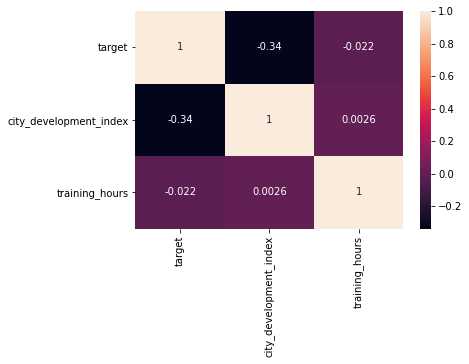

In [25]:
corr = df[['target', 'city_development_index', 'training_hours']].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)

Nesse caso, city_development_index tem uma alta correlação com o target, relativa às outras variáveis, enquanto podemos descartar training_hours.

# Dataset final utilizado + One hot encoding + OrdinalEncode

In [26]:
df = df[['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','Missing_size','Missing_type','last_new_job','city_development_index','target']]

In [27]:
sorted(df['experience'].unique())

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '<1',
 '>20']

In [28]:
def encoder(x, lista):
    for i in range(len(lista)):
        if x == lista[i]:
            return i
        
def padronizar(x):
    return (x - min(x))/(max(x) - min(x))
    
df['last_new_job'] = df['last_new_job'].map(lambda x: encoder(x,['never', '1','2','3','4','>4']))
df['experience'] = df['experience'].map(lambda x: encoder(x,['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']))

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    18014 non-null  object 
 1   gender                  18014 non-null  object 
 2   relevent_experience     18014 non-null  object 
 3   enrolled_university     18014 non-null  object 
 4   education_level         18014 non-null  object 
 5   major_discipline        18014 non-null  object 
 6   experience              18014 non-null  int64  
 7   Missing_size            18014 non-null  object 
 8   Missing_type            18014 non-null  object 
 9   last_new_job            18014 non-null  int64  
 10  city_development_index  18014 non-null  float64
 11  target                  18014 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 2.3+ MB


In [30]:
df.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,Missing_size,Missing_type,last_new_job,city_development_index,target
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,1,1,1,0.920,1.0
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,0,0,5,0.776,0.0
2,city_21,Missing Value,No relevent experience,Full time course,Graduate,STEM,5,1,1,0,0.624,0.0
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,21,0,0,4,0.767,0.0
5,city_176,Missing Value,Has relevent experience,Part time course,Graduate,STEM,11,1,1,1,0.764,1.0


In [31]:
df = pd.get_dummies(df)

In [32]:
df.head()

,experience,last_new_job,city_development_index,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,...,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_Missing Value,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,Missing_size_0,Missing_size_1,Missing_type_0,Missing_type_1
0,21,1,0.920,1.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
1,15,5,0.776,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,5,0,0.624,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,21,4,0.767,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
5,11,1,0.764,1.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1


# Modelos

Para resumo do estudo vamos comparar apenas 2 modelos e avaliar a diferença entre suas métricas. Desse modo, utilizaremos o SVM e uma Random Forest de Árvores que minimizam a entropia.

In [33]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

### Random Forest - ID3

In [34]:
ID3 = RandomForestClassifier(
    max_depth=25,
    n_estimators=200,
    min_samples_split=50,
    criterion='entropy',
    oob_score=True,
    random_state=42
)
ID3.fit(X_train.values, y_train.values)
y_pred1 = ID3.predict(X_test.values)

c:\users\luisc\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\users\luisc\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\users\luisc\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


79.33%
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      4077
         1.0       0.58      0.55      0.57      1328

    accuracy                           0.79      5405
   macro avg       0.72      0.71      0.72      5405
weighted avg       0.79      0.79      0.79      5405



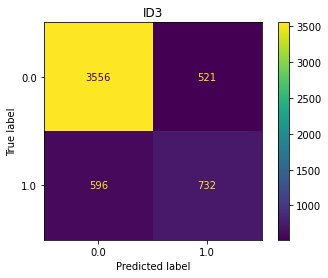

In [35]:
plot_confusion_matrix(ID3, X_test, y_test, values_format='d')
plt.title('ID3')
score1 = ID3.score(X_test, y_test)
print(f'{score1*100:.2f}%')
print(classification_report(y_test, y_pred1))

### SVM

In [36]:
SVM = svm.SVC(C = 1000)
SVM.fit(X_train, y_train)
y_pred2 = SVM.predict(X_test)

c:\users\luisc\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


79.32%
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      4077
         1.0       0.57      0.61      0.59      1328

    accuracy                           0.79      5405
   macro avg       0.72      0.73      0.73      5405
weighted avg       0.80      0.79      0.80      5405



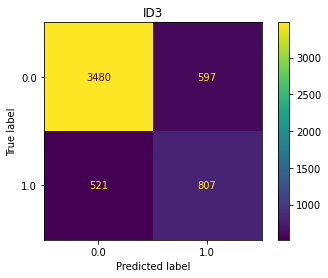

In [37]:
plot_confusion_matrix(SVM, X_test, y_test, values_format='d')
plt.title('ID3')
score2 = SVM.score(X_test, y_test)
print(f'{score2*100:.2f}%')
print(classification_report(y_test, y_pred2))

Apesar de não ter muitas mudanças, o SVM se mostrou mais balançeado, enquanto a random forest focou mais na precisão do acerto do 0. Uma hipotese é que isso ocorra devido a uma quantidade maior de 0 no dataset.